In [1]:
import numpy as np
import os, sys, glob, abc
%matplotlib inline
from matplotlib import pyplot as plt, colors
def read(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data

# Where is the dataset stored?
dataset = "/data/i3store/users/mjlarson/student_data"

# Read in all of the data files
data_files = dataset + "/IC86_*exp.npy"
data = read(glob.glob(data_files))

# Read in all of the MC files 
sim_files = dataset + "/IC86*MC*npy"
sim = read(glob.glob(sim_files))

# Set the angular error floor to 0.2 degrees
data['angErr'][data['angErr']<np.deg2rad(1)] = np.deg2rad(1)
sim['angErr'][sim['angErr']<np.deg2rad(1)] = np.deg2rad(1)

data['ra']=np.random.uniform(0,2*np.pi,size=len(data))


Bad key "text.kerning_factor" on line 4 in
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
grl_files = dataset + "/GRL/IC86_*exp.npy"
grl = read(glob.glob(grl_files))

# Show the keys available in the GRL
print("Keys available in the GoodRunList:")
print(sorted(grl.dtype.names))

Keys available in the GoodRunList:
['events', 'livetime', 'run', 'start', 'stop']


In [3]:
import mla.core
from mla.spectral import *
from mla import injection
import mla.sensitivtiy 

dec = 22.0145*np.pi/180
ra = 83.63*np.pi/180


In [4]:
from imp import reload
import scipy.optimize
reload(mla.core)
reload( mla.sensitivtiy )

import warnings
warnings.filterwarnings("ignore")
test=mla.sensitivtiy.PS_sensitivity()
test.background_building(data,sim,save_file="")
test.load_background(dir_name="")


In [5]:
test.set_point_source(ra,dec,data,sim,"PowerLaw",background_time_profile = (55700,55701))

In [6]:
test.set_backround(data,grl)

In [7]:
test.set_injection(sim,background_time_profile = (55700,55701))

In [8]:
test.calculate_sensitivity(list_N = np.linspace(1e-19,5e-17,15),make_plot="")

Now testing : 1e-19
[0.01, 0.495]
Now testing : 3.664285714285715e-18
[0.005, 0.56]
Now testing : 7.228571428571429e-18
[0.01, 0.615]
Now testing : 1.0792857142857143e-17
[0.04, 0.665]
Now testing : 1.435714285714286e-17
[0.08, 0.73]
Now testing : 1.7921428571428572e-17
[0.04, 0.715]
Now testing : 2.148571428571429e-17
[0.095, 0.815]
Now testing : 2.5050000000000005e-17
[0.11, 0.825]
Now testing : 2.8614285714285715e-17
[0.145, 0.86]
Now testing : 3.217857142857143e-17
[0.21, 0.875]
Now testing : 3.574285714285714e-17
[0.265, 0.89]
Now testing : 3.930714285714286e-17
[0.34, 0.935]
Now testing : 4.287142857142857e-17
[0.35, 0.905]
Now testing : 4.6435714285714286e-17
[0.3, 0.925]
Now testing : 5e-17
[0.405, 0.98]
Now testing : 1e-16
[0.81, 1.0]
Threshold: 90, N : 1.0002922596041346
Threshold_potential: 50, N : 0.8090208575167722


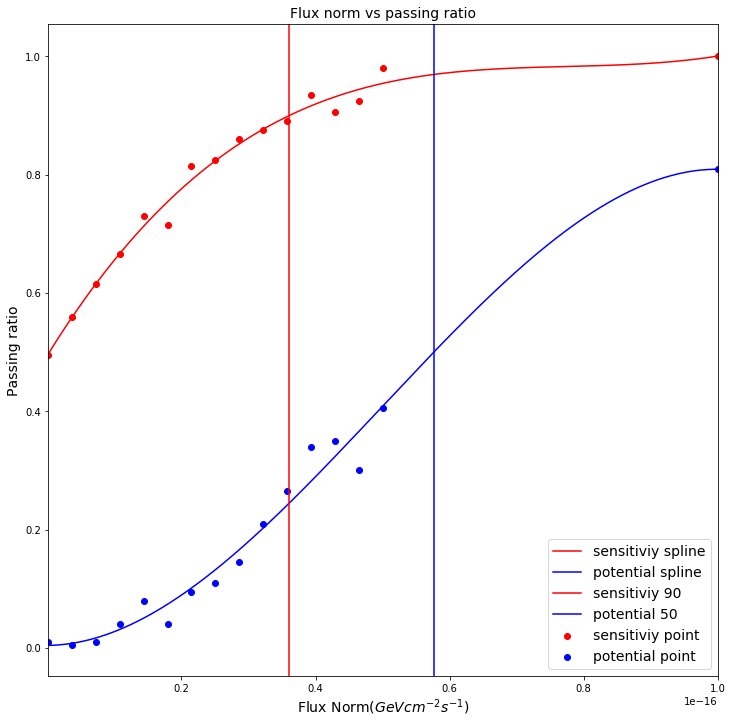

In [9]:
from matplotlib import pyplot as plt, colors
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(test.list_N,test.result[:,1],label = 'sensitiviy point',color='r')
ax.scatter(test.list_N,test.result[:,0],label = 'potential point',color='b')
ax.set_xlim(test.list_N[0],test.list_N[-1])
ax.plot(np.linspace(test.list_N[0],test.list_N[-1],1000),test.spline_sen(np.linspace(test.list_N[0],test.list_N[-1],1000)),label = 'sensitiviy spline',color='r')
ax.plot(np.linspace(test.list_N[0],test.list_N[-1],1000),test.spline_sigma(np.linspace(test.list_N[0],test.list_N[-1],1000)),label = 'potential spline',color='b')
for i in range(len(test.Threshold_result)):
    ax.axvline(test.Threshold_result[i],label = 'sensitiviy '+str(test.Threshold_list[i]),color='r')
for i in range(len(test.Threshold_potential_result)):
    ax.axvline(test.Threshold_potential_result[i],label = 'potential '+str(test.Threshold_potential[i]),color='b')
ax.set_title("Flux norm vs passing ratio",fontsize=14)
ax.set_xlabel(r"Flux Norm($GeV cm^{-2} s^{-1}$)",fontsize=14)
ax.set_ylabel(r"Passing ratio",fontsize=14)
ax.legend(fontsize=14)


In [10]:
test.Threshold_potential_result[i]

5.764828290509454e-17

In [ ]:
test.background_